In [1]:
import matplotlib.gridspec as gridspec

In [2]:
import stained_glass.idealized as idealized
import stained_glass.stats as stats

## Make Explanatory Plot

## Parameters

In [3]:
# Number of sightlines
n = 1000

In [4]:
# Choose statistics
statistics = {
    'TPCF': {
        'fn': stats.two_point_autocf,
    }
}

#### Setup idealized projections

In [5]:
ips = []

In [6]:
# Radial distribution
ip = idealized.IdealizedProjection()
ip.add_ellipse(
    c = (0., 0.),
    a = 5.,
)
ips.append( ip )

In [7]:
# Radial distribution and satellite
ip = idealized.IdealizedProjection()
ip.add_ellipse(
    c = (0., 0.),
    a = 5.,
)
ip.add_ellipse(
    c = (5., 5.),
    a = 2.,
)
ips.append( ip )

In [8]:
# Clumps
ip = idealized.IdealizedProjection()
ip.add_clumps(
    r_clump = 0.2,
    c = (0., 0.),
    r_area = 5.,
    fcov = 0.5,
)
ips.append( ip )

In [9]:
# Filament
ip = idealized.IdealizedProjection()
ip.add_curve(
    v1 = (-1., 0.),
    v2 = (-8., 2.),
    theta_a = 20.,
    theta_b = 40.,
)
ips.append( ip )

### Draw Plot

In [10]:
nrows = len( ips )

In [11]:
ncols = len( statistics ) + 2

AttributeError: 'numpy.ndarray' object has no attribute '_geom'

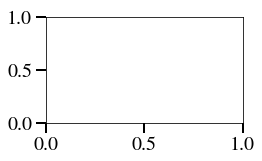

In [12]:
fig = plt.figure( figsize=(3*nrows, 3*ncols), facecolor='w' )
ax = plt.gca()

gs = gridspec.GridSpec( nrows, ncols )

for i, ip in enumerate( ips ):
    
    # Generate sightlines
    ip.generate_sightlines( n )
    
    # Plot the idealized image
    ax = plt.subplot( gs[i,0] )
    ip.plot_idealized_projection(
        ax,
    )